In [1]:
%pdb
import sys
sys.path.append("../")
import numpy as np
import matplotlib.pyplot as plt

from data.kitti_semantic import Kitti360Semantic

Automatic pdb calling has been turned ON


In [5]:
dataset = Kitti360Semantic(data_dir="/home/namrata/projects/data/kitti-360/data_2d_semantics/train", sample_size=None, rgb=True)

In [6]:
len(dataset)

61390

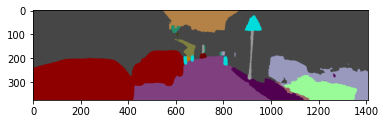

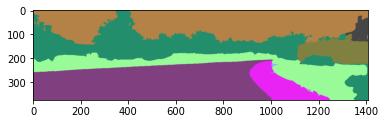

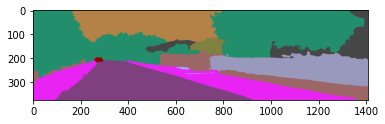

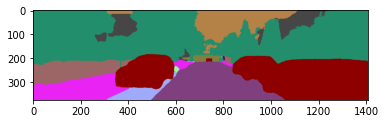

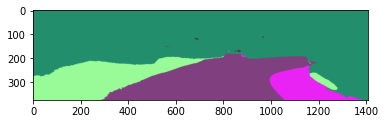

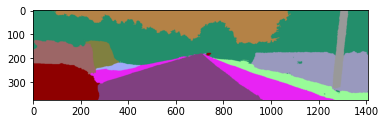

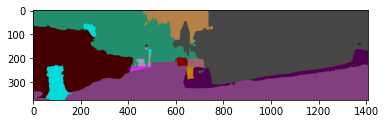

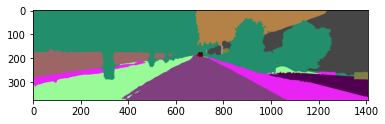

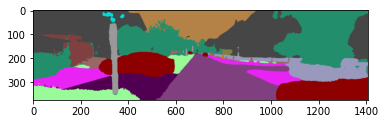

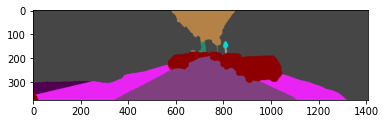

In [7]:
for i in range(10):
    mask = dataset[np.random.randint(len(dataset))]['mask'].permute(1, 2, 0)
    plt.imshow(mask)
    plt.show()